<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 6</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.


<div style="text-align: center;">
    <h3><strong>Imports and built-in functions</strong></h3>
</div>

In [1]:
import numpy as np
#Import in-built functions for different integration techniques
#For reference: https://docs.scipy.org/doc/scipy/reference/integrate.html
from scipy.integrate import quad, fixed_quad, romberg, dblquad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

<div style="text-align: center;">
    <h2><strong> Monte Carlo Method v.s. Deterministic Quadrature </strong></h2>
</div>

In this problem, you will be looking at the difference between various deterministic and non-deterministic methods. Let's consider an ellipsoid parametrized by,
$$ \frac{{x^2+y^2} }{\beta^2}+\frac{z^2}{c^2}=1 $$
where $-1\leq x \leq 1$ and $-1\leq y \leq 1$. Let's consider the surface element, 
$$ A=  \int_{\partial V} 1 dA $$



## A) 
Write down the explicit integration formula in LaTeX for surface area. Remember to express the integration boundaries, 

-------------------------write your expression below-----------------------------------------
$$
\frac{x^2 + y^2}{\beta^2} + \frac{z^2}{c^2} = 1
$$

$$
x = \beta \sqrt{1 - \frac{z^2}{c^2}}
$$

$$
z = c \sqrt{1 - \frac{x^2}{\beta^2}}
$$

The surface area of a solid of revolution is

$$
A = 2\pi \int_{a}^{b} f(x) \sqrt{1 + \left(\frac{df}{dx}\right)^2} \, dx
$$


The derivative is calculated as

$$
\frac{df}{dx} = \frac{d}{dx} \left( \beta \sqrt{1 - \frac{x^2}{\beta^2}} \right) = -\frac{x}{\sqrt{\beta^2 - x^2}}
$$

the surface area A  is given by


$$
A = 2\pi \int_{0}^{\beta} \beta \sqrt{1 - \frac{x^2}{\beta^2}} \sqrt{1 + \left(-\frac{x}{\sqrt{\beta^2 - x^2}}\right)^2} \, dx
$$
Here I used symmetry to factor out the 2, so x is from 0 to beta



-----------------------------write your expression above-------------------------------------

hint: You should be able to express it using a single variable. 

## B) 
Use the above formula approximate the area by using **two** deterministic quadrature techniques: 1) the midpoint rule and 2) Gaussian quadrature (you can use **your code from previous problem set**.) Verify the calculated values with the formulas below, 
$$A=2\pi \beta^2\left(1+\frac{c}{a e} \mathrm{sin^{-1}}(e) \right), \hspace{0.2cm} e=1-\frac{\beta^2}{c^2}$$
 
You may realize that I did not provide the value of a and c. Plot the error as a heatmap with various $\beta,c$ values ranging from [0.001,1000]. Does the value of a and c has any influence on the error?


C:\Users\lucky\AppData\Local\Temp\ipykernel_38508\181709518.py:17: RuntimeWarning: invalid value encountered in sqrt
  e = np.sqrt(1 - beta**2 / c**2)
C:\Users\lucky\AppData\Local\Temp\ipykernel_38508\181709518.py:18: RuntimeWarning: divide by zero encountered in true_divide
  return 2 * np.pi * beta**2 * (1 + (c / (beta * e)) * np.arcsin(e))
C:\Users\lucky\AppData\Local\Temp\ipykernel_38508\181709518.py:18: RuntimeWarning: invalid value encountered in multiply
  return 2 * np.pi * beta**2 * (1 + (c / (beta * e)) * np.arcsin(e))
C:\Users\lucky\AppData\Local\Temp\ipykernel_38508\181709518.py:13: RuntimeWarning: invalid value encountered in sqrt
  return beta * np.sqrt(1 - x**2 / beta**2) * np.sqrt(1 + (x / np.sqrt(beta**2 - x**2))**2)
C:\Users\lucky\AppData\Local\Temp\ipykernel_38508\181709518.py:40: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  gaussian_areas = 2 * 

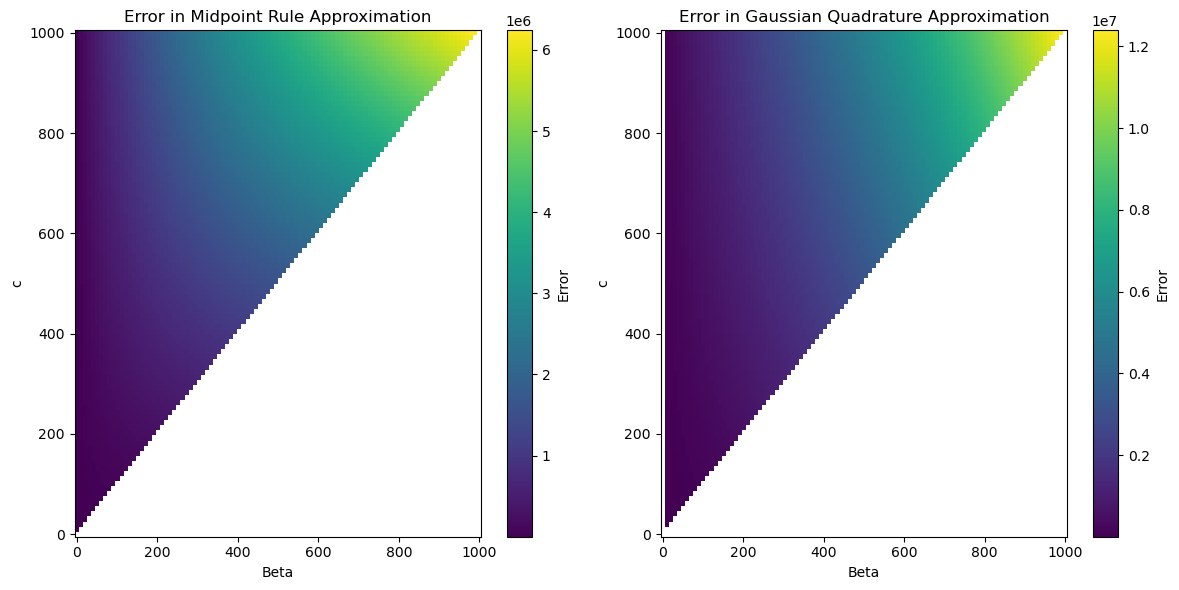

'--------------------Write your code above this line------------------------------'

In [10]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

# Constants
beta = 1  # Assuming beta = 1 for simplicity
c = 1     # Assuming c = 1 for simplicity
n = 10    # Number of subintervals or points for approximation

# Define the integrand function
def f(x, beta, c):
    return beta * np.sqrt(1 - x**2 / beta**2) * np.sqrt(1 + (x / np.sqrt(beta**2 - x**2))**2)

# Function to calculate the exact surface area of the ellipsoid
def exact_surface_area(beta, c):
    e = np.sqrt(1 - beta**2 / c**2)
    return 2 * np.pi * beta**2 * (1 + (c / (beta * e)) * np.arcsin(e))

# Define the range of beta and c values
beta_values = np.linspace(0.001, 1000, 100)
c_values = np.linspace(0.001, 1000, 100)

# Create a meshgrid for beta and c values
beta_grid, c_grid = np.meshgrid(beta_values, c_values)

# Exact areas
exact_areas = exact_surface_area(beta_grid, c_grid)

# Midpoint approximation
delta_x = beta_grid / n
midpoints = np.linspace(delta_x/2, beta_grid - delta_x/2, n)
midpoint_sum = np.sum(f(midpoints, beta_grid, c_grid), axis=0)
midpoint_areas = 2 * np.pi * delta_x * midpoint_sum

# Gaussian Quadrature approximation
def integrand(x, beta, c):
    return f(x, beta, c)

gaussian_areas = 2 * np.pi * np.array([integrate.quad(integrand, 0, beta, args=(beta_val, c_val), points=[0])[0] for beta_val, c_val in zip(beta_grid.ravel(), c_grid.ravel())])
gaussian_areas = gaussian_areas.reshape(beta_grid.shape)

# Calculate errors
error_midpoint = np.abs(exact_areas - midpoint_areas)
error_gaussian = np.abs(exact_areas - gaussian_areas)

# Plot the error as a heatmap
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pcolormesh(beta_grid, c_grid, error_midpoint, shading='auto')
plt.colorbar(label='Error')
plt.title('Error in Midpoint Rule Approximation')
plt.xlabel('Beta')
plt.ylabel('c')

plt.subplot(1, 2, 2)
plt.pcolormesh(beta_grid, c_grid, error_gaussian, shading='auto')
plt.colorbar(label='Error')
plt.title('Error in Gaussian Quadrature Approximation')
plt.xlabel('Beta')
plt.ylabel('c')

plt.tight_layout()
plt.show()



'''--------------------Write your code above this line------------------------------'''

## C) 
Let's first consider the surface with non-deterministic quadrature techniques (Monte Carlo). As discussed in class, the following simple Monte Carlo simulation can be used to approximate a 2d integral,
$$     \int_a^b f(x) dx =\lim_{N\to \infty} \frac{b-a}{N} \sum_{i=0}^N f(x_i), \hspace{0.2cm} X \sim U(a,b) $$
and we set $2\beta=c=1$. For each sampling size, N=[10,100,1000,10000,100000], calculate the error, and plot them. 



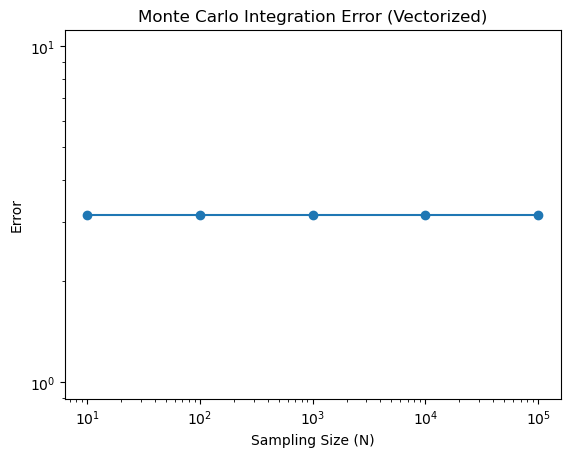

'--------------------Write your code above this line------------------------------'

In [45]:
'''--------------------Write your code below this line------------------------------'''

import numpy as np
import matplotlib.pyplot as plt

# Define the function to integrate
def f_monte_carlo(x):
    return 0.5 * np.sqrt(1 - 4*x**2) * np.sqrt(1 + (2*x / np.sqrt(1 - 4*x**2))**2)

# Parameters
exact_area_2beta_c = 2 * np.pi  # Set the exact value for your specific function
N_values = [10, 100, 1000, 10000, 100000]

# Vectorized Monte Carlo approximation
errors_monte_carlo_vectorized = []

for N in N_values:
    samples = np.random.uniform(0, 0.5, (N,))
    monte_carlo_approximation = 2 * np.pi * np.mean(f_monte_carlo(samples))
    error = np.abs(exact_area_2beta_c - monte_carlo_approximation)
    errors_monte_carlo_vectorized.append(error)

# Plot the errors
plt.plot(N_values, errors_monte_carlo_vectorized, marker='o')
plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.yscale('log')  # Use a logarithmic scale for better visualization
plt.xlabel('Sampling Size (N)')
plt.ylabel('Error')
plt.title('Monte Carlo Integration Error (Vectorized)')
plt.show()



'''--------------------Write your code above this line------------------------------'''

 <div style="text-align: center;">
    <h3><strong>Box–Muller transform </strong></h3>
</div>

Let's take a closer look at a joint probability,
$$ p(x,y)=\frac{1}{2\pi} e^{-(x^2+y^2)/2}$$
and changing from x,y to $\theta, R$, we have,
$$ p(R,\theta)=p(x,y) \frac{\partial |x,y|}{\partial |\theta,R|}= \frac{1}{2\pi} R e^{-(R^2)/2} $$
where $ \frac{\partial |x,y|}{\partial |\theta,R|}=\rm det|J|=R$. This is called the Rayleigh distribution, which coincides with the $\chi$ distribution with two degrees of freedom (DOF). Let's consider two random variables that follow a standard normal distribution, with $X$ and $Y$ denoted as $X, Y \sim \mathcal{N}(0, 1)$, representing two components of a vector. The cumulative distribution function (CDF) of the joint probability is given,
$$    P(\sqrt{X^2+Y^2}\leq R)=\int_0^{2\pi} \int_0^{R} r  \frac{1}{2\pi} e^{-r^2/2} dr d\theta. $$
It gives the same PDF as the probability density above. 

## D) 
Using the Box–Muller transform, write a python function that generates Gaussian distributed samples (return a numpy array) with mean $\mu$ and standard deviation $\sigma$. 

Plot the histogram with sampling size, N=[10,100,1000,10000,100000].



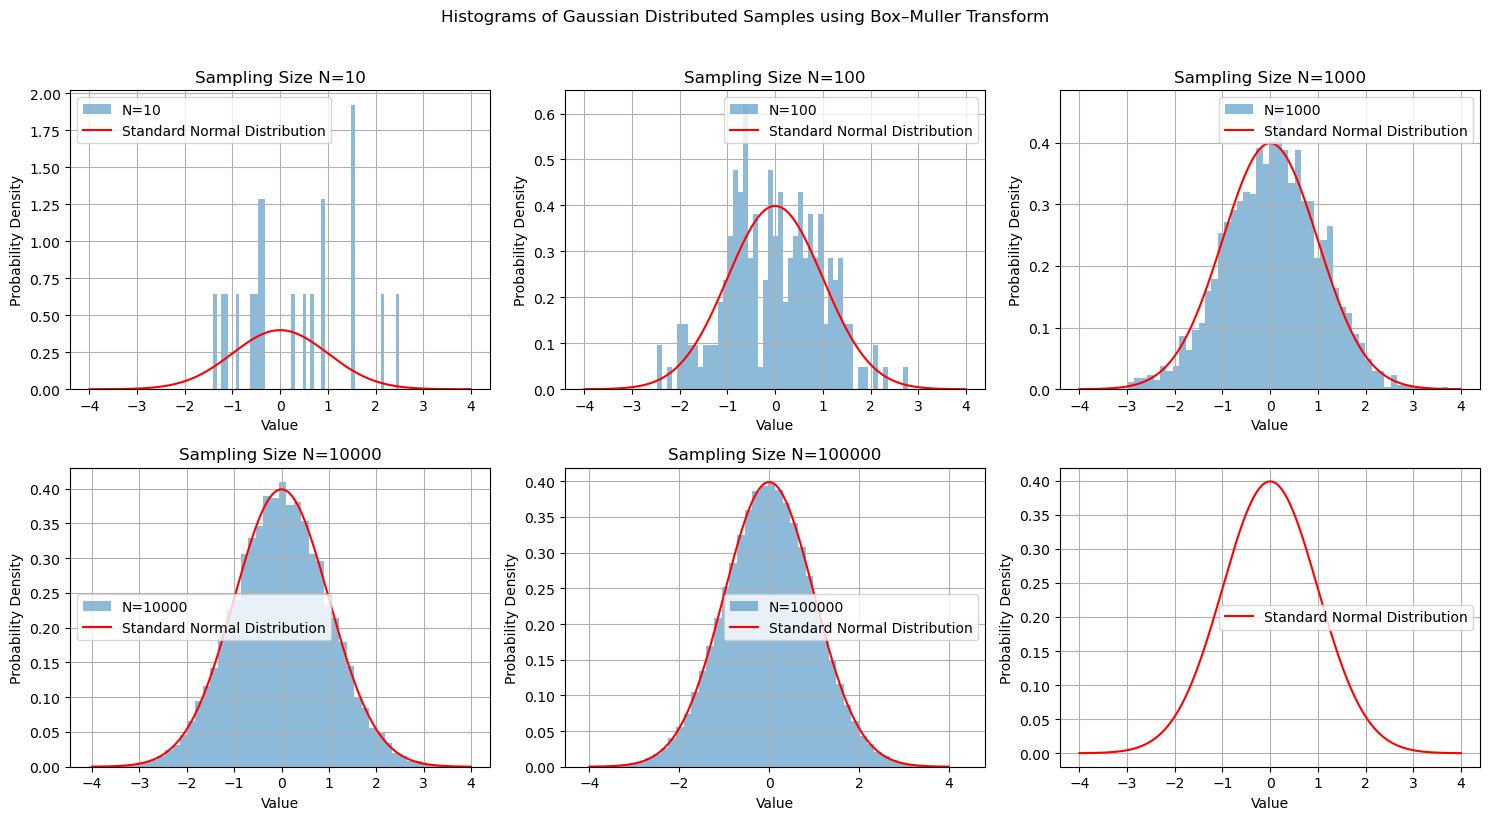

'--------------------Write your code above this line------------------------------'

In [16]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

def box_muller(mu, sigma, N):
    u1 = np.random.rand(N)
    u2 = np.random.rand(N)
    z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    samples = mu + sigma * np.concatenate((z0, z1))
    return samples

# Plot histograms for different sampling sizes in separate subplots
N_values = [10, 100, 1000, 10000, 100000]
mu = 0
sigma = 1

fig, axs = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Histograms of Gaussian Distributed Samples using Box–Muller Transform', y=1.02)

for i, N in enumerate(N_values):
    row = i // 3
    col = i % 3
    samples = box_muller(mu, sigma, N)
    axs[row, col].hist(samples, bins=50, density=True, alpha=0.5, label=f'N={N}')
    axs[row, col].set_title(f'Sampling Size N={N}')

# Plot the standard normal distribution for comparison
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
pdf_standard_normal = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

for ax in axs.flat:
    ax.plot(x, pdf_standard_normal, 'r', label='Standard Normal Distribution')
    ax.set_xlabel('Value')
    ax.set_ylabel('Probability Density')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()



'''--------------------Write your code above this line------------------------------'''

## E) 
Do a simple Monte Carlo simulation, this time using different Gaussian-distributed samples as mentioned above, 
$$     \int_a^b f(x) dx =\lim_{N\to \infty} \frac{b-a}{N} \sum_{i=0}^N f(x_i), \hspace{0.2cm} X \sim N(\mu,\sigma) $$
and we set $2a=c=1$. Let's first assume $\mu=0$ and $\sigma=1$. For each sampling size, N=[10,100,1000,10000,100000], calculate the error, and plot them. 


Next, test various $\mu$ and $\sigma$ with a fixed $N=10000$, calculate the error, and plot them. 
How is it different from C)? 





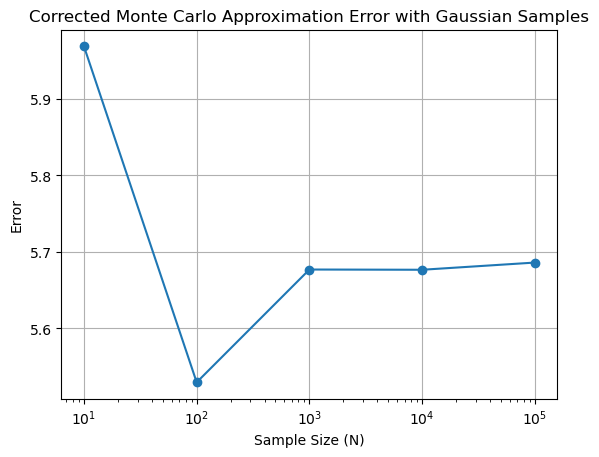

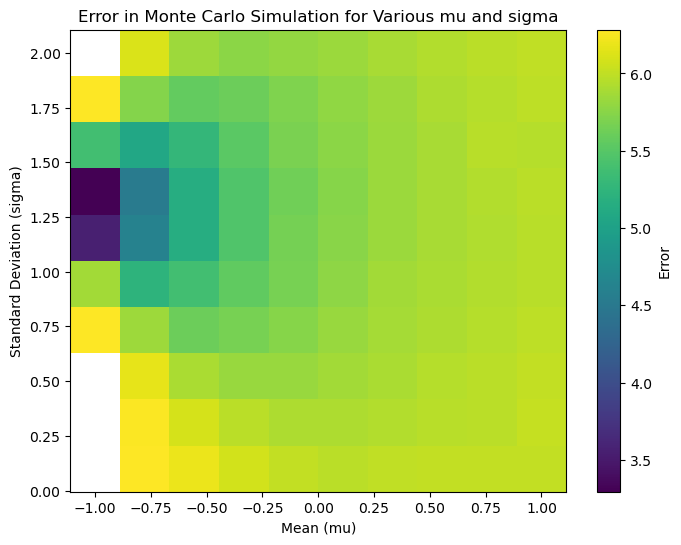

'--------------------Write your code above this line------------------------------'

In [43]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

# Function to integrate
def f_monte_carlo(x):
    return 0.5 * np.sqrt(1 - 4 * x**2) * np.sqrt(1 + (2 * x / np.sqrt(1 - 4 * x**2))**2)

# Function to perform a corrected Monte Carlo simulation with Gaussian samples
def monte_carlo_gaussian_corrected(f, mu, sigma, size):
    samples = np.random.normal(mu, sigma, size)
    valid_samples = samples[(samples >= 0) & (samples <= 0.5)]
    f_values = f(valid_samples)
    proportion_of_valid_samples = len(valid_samples) / size
    approximation = 2 * np.pi * np.mean(f_values) * proportion_of_valid_samples
    return approximation

# Function to calculate errors for a range of sample sizes
def calculate_errors_for_sample_sizes(f, mu, sigma, sample_sizes, exact_area):
    errors = []
    for N in sample_sizes:
        monte_carlo_approximation = monte_carlo_gaussian_corrected(f, mu, sigma, N)
        error = np.abs(exact_area - monte_carlo_approximation)
        errors.append(error)
    return errors

# Function to create a heatmap of errors for various mu and sigma
def create_heatmap_errors(f, mu_values, sigma_values, N_fixed, exact_area):
    error_grid = np.zeros((len(mu_values), len(sigma_values)))
    for i, mu in enumerate(mu_values):
        for j, sigma in enumerate(sigma_values):
            monte_carlo_approximation = monte_carlo_gaussian_corrected(f, mu, sigma, N_fixed)
            error = np.abs(exact_area - monte_carlo_approximation)
            error_grid[i, j] = error
    return error_grid

# Parameters
exact_area_2beta_c = 2 * np.pi
sample_sizes = [10, 100, 1000, 10000, 100000]

# Recalculate errors with the corrected Monte Carlo simulation
errors_monte_carlo_gaussian_corrected = calculate_errors_for_sample_sizes(f_monte_carlo, 0, 1, sample_sizes, exact_area_2beta_c)

# Plotting the corrected error
plt.plot(sample_sizes, errors_monte_carlo_gaussian_corrected, marker='o')
plt.xscale('log')
plt.xlabel('Sample Size (N)')
plt.ylabel('Error')
plt.title('Corrected Monte Carlo Approximation Error with Gaussian Samples')
plt.grid(True)
plt.show()

# Define ranges for mu and sigma
mu_values = np.linspace(-1, 1, 10)
sigma_values = np.linspace(0.1, 2, 10)

# Fixed sample size
N_fixed = 10000

# Create a heatmap of errors for various mu and sigma
error_grid = create_heatmap_errors(f_monte_carlo, mu_values, sigma_values, N_fixed, exact_area_2beta_c)

# Plotting the errors as a heatmap
mu_grid, sigma_grid = np.meshgrid(mu_values, sigma_values)

plt.figure(figsize=(8, 6))
plt.pcolormesh(mu_grid, sigma_grid, error_grid, shading='auto')
plt.colorbar(label='Error')
plt.xlabel('Mean (mu)')
plt.ylabel('Standard Deviation (sigma)')
plt.title('Error in Monte Carlo Simulation for Various mu and sigma')
plt.show()



'''--------------------Write your code above this line------------------------------'''

 <div style="text-align: center;">
    <h2><strong>Rejection Sampling </strong></h2>
</div>

Rejection sampling is used to generate data points that follow a particular complicated distribution. Let's say that the probability of observing a particle decay event at time t follows the probability density function (PDF),

$$p(x)=e^{-bt}cos^2(at), \hspace{0.2cm} t \geq 0$$. 

See below for an example when $a=4b=4$ (If you are interested, you can refer to the lecture notes on the Lorentzian function for energy dissipation). 

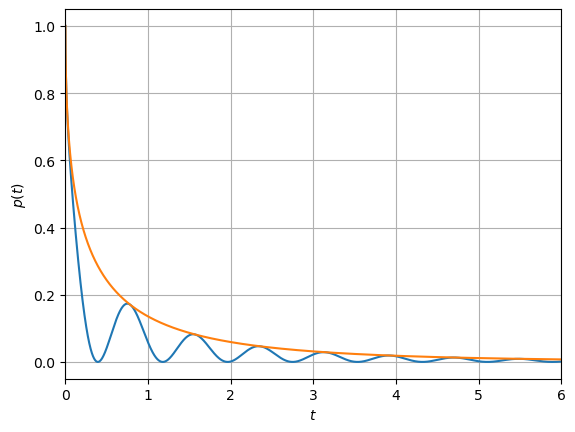

In [23]:
# Example
t = np.linspace(0, 6, 100000)
y = np.exp(-2*np.sqrt(t))*np.cos(4*t)**2
y2 = np.exp(-2*np.sqrt(t)) 
plt.plot(t, y)
plt.plot(t, y2)
plt.grid(True)
plt.xlim(0, 6)
plt.xlabel('$t$')
plt.ylabel('$p(t)$') 
plt.show()

## A) 
Write a rejection sampling function by using a **uniform proposal function**, 
$$f(t) \sim U(0,t_f)$$
to sample the PDF discussed above, with  $a=4b=4$. 

It should return a N sample numpy array. How do you select the $t_f$? Plot the resulting sample histogram with N=[100,1000,10000]. 



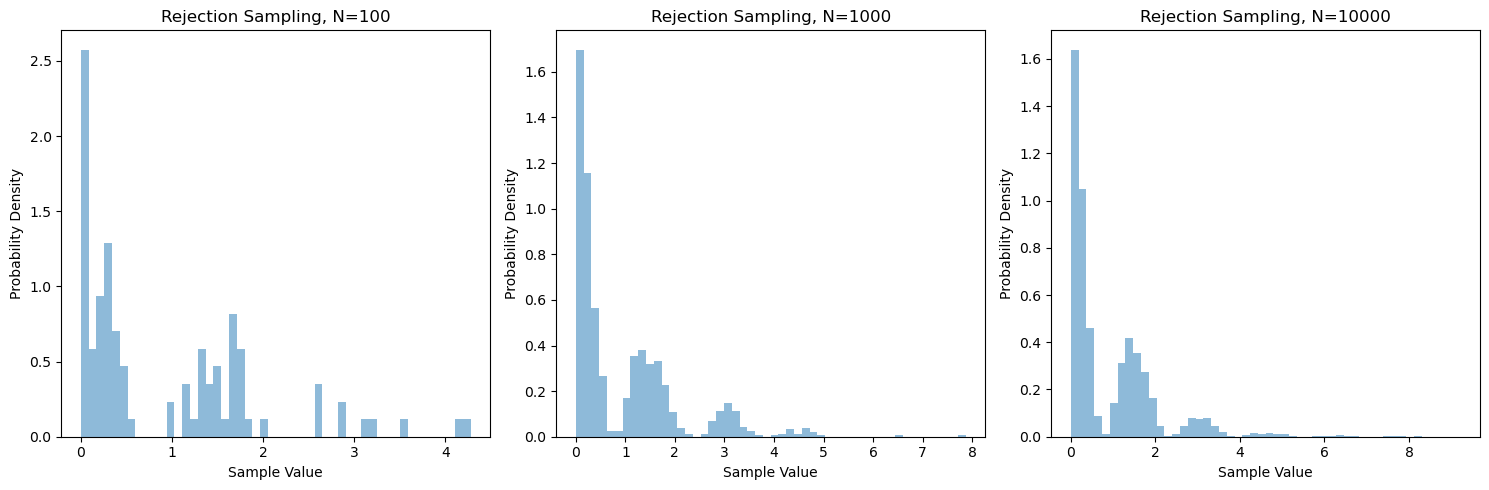

'--------------------Write your code above this line------------------------------'

In [26]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

a = 2  # You may adjust these values as needed
b = 1

def p(t):
    return np.exp(-b * t) * np.cos(a * t)**2

def rejection_sampling(N, tf):
    max_p = p(0)  # Maximum of p(x) in the range
    samples = []

    while len(samples) < N:
        t = np.random.uniform(0, tf)
        u = np.random.uniform(0, 1)
        if u <= p(t) / max_p:
            samples.append(t)

    return np.array(samples)

tf = 15
sample_sizes = [100, 1000, 10000]

plt.figure(figsize=(15, 5))

for i, N in enumerate(sample_sizes, 1):
    plt.subplot(1, len(sample_sizes), i)
    samples = rejection_sampling(N, tf)
    plt.hist(samples, bins=50, density=True, alpha=0.5, label=f'N={N}')
    plt.title(f'Rejection Sampling, N={N}')
    plt.xlabel('Sample Value')
    plt.ylabel('Probability Density')

plt.tight_layout()
plt.show()




'''--------------------Write your code above this line------------------------------'''

## B) 
Write a rejection sampling function by using a **exponential proposal function**, 
$$f(t) \sim Exp(1)=e^{-2t}$$
to sample the PDF discussed above, with the same $a=4b=4$. 

It should return a N sample numpy array. Plot the resulting sample histogram with N=[100,1000,10000]. Make a comparison between the uniform proposal function and exponential proposal function at various sample sizes. 


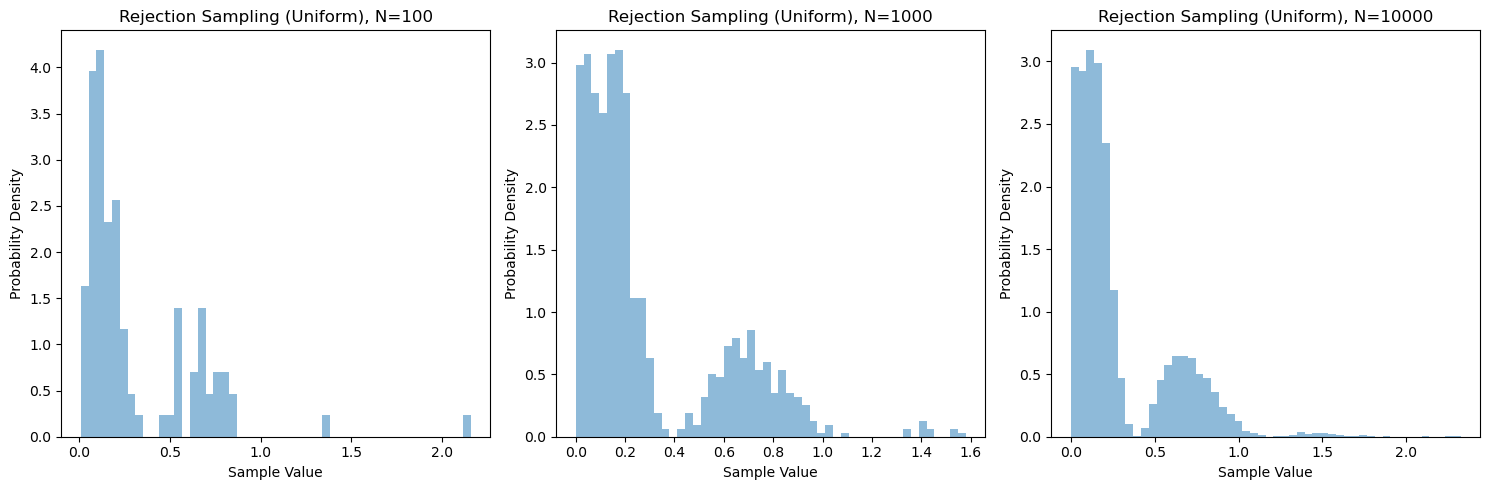

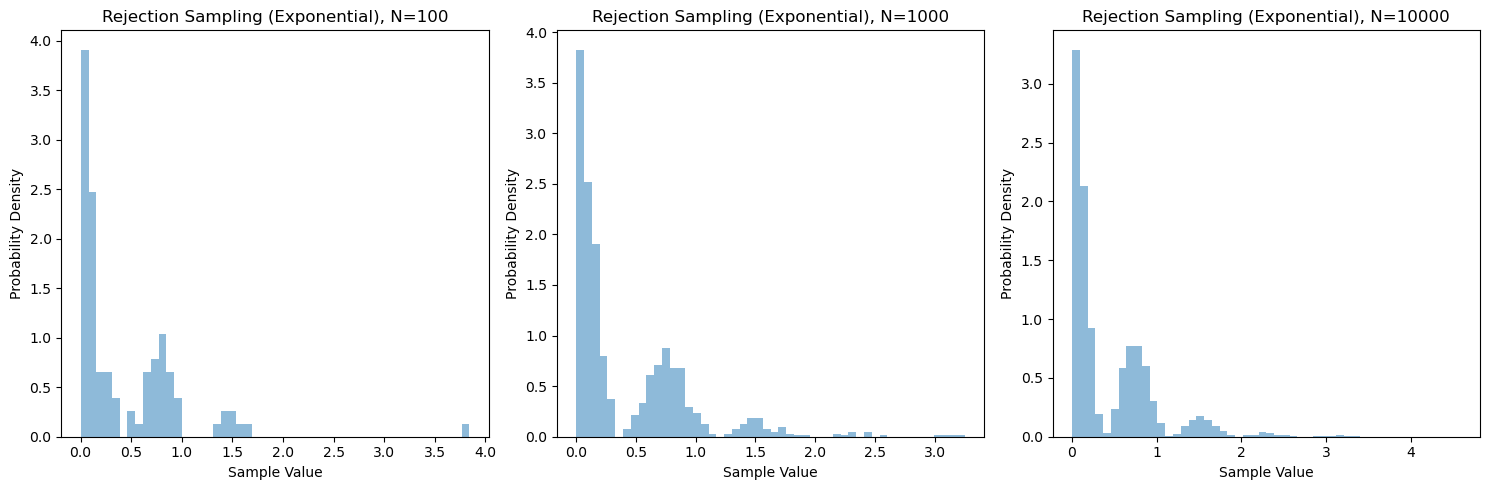

'--------------------Write your code above this line------------------------------'

In [27]:
'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
a = 4
b = 4

def target_distribution(t):
    return np.exp(-b * t) * np.cos(a * t)**2

def uniform_proposal(t):
    return 1 / 4  # Uniform proposal distribution in the range [0, 4]

def exponential_proposal(t):
    return np.exp(-2 * t)  # Exponential proposal distribution with rate parameter 2

def rejection_sampling(N, proposal_function, tf):
    max_p = target_distribution(0)  # Maximum of the target distribution in the range
    samples = []

    while len(samples) < N:
        t = np.random.uniform(0, tf)
        u = np.random.uniform(0, 1)
        if u <= target_distribution(t) / (max_p * proposal_function(t)):
            samples.append(t)

    return np.array(samples)

# Parameters
tf = 15
sample_sizes = [100, 1000, 10000]

plt.figure(figsize=(15, 5))

# Rejection sampling with uniform proposal
for i, N in enumerate(sample_sizes, 1):
    plt.subplot(1, len(sample_sizes), i)
    samples_uniform = rejection_sampling(N, uniform_proposal, tf)
    plt.hist(samples_uniform, bins=50, density=True, alpha=0.5, label=f'Uniform, N={N}')
    plt.title(f'Rejection Sampling (Uniform), N={N}')
    plt.xlabel('Sample Value')
    plt.ylabel('Probability Density')

plt.tight_layout()
plt.show()

# Rejection sampling with exponential proposal
plt.figure(figsize=(15, 5))

for i, N in enumerate(sample_sizes, 1):
    plt.subplot(1, len(sample_sizes), i)
    samples_exponential = rejection_sampling(N, exponential_proposal, tf)
    plt.hist(samples_exponential, bins=50, density=True, alpha=0.5, label=f'Exponential, N={N}')
    plt.title(f'Rejection Sampling (Exponential), N={N}')
    plt.xlabel('Sample Value')
    plt.ylabel('Probability Density')

plt.tight_layout()
plt.show()



'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h2><strong> Optimization </strong></h2>
</div>
 
<div style="text-align: center;">
    <h3><strong>   Gradient descent, Metropolis–Hastings algorithm, Simulated Annealing </strong></h3>
</div>
 

Gradient descent is a deterministic method for optimization. It requires the function to be differentiable and
convex.  The general formula for gradient descent is as follows:

Let $H(\theta)$ be the cost or loss function, where $\theta$ represents the model parameters. The goal is to find the optimal $\theta$ that minimizes $H(\theta)$.



The process of gradient descent involves starting with an initial guess for $\theta_i$, then iteratively applying the update rule until convergence. Convergence is typically determined by monitoring the change in the cost function or the norm of the gradient.


The update rule for gradient descent is as follows:

$$\theta_{i+1} = \theta_{i} - \alpha_i \cdot \nabla H(\theta_{i})$$

where $\alpha_i$ The learning rate, which is a hyperparameter that determines the step size of each update. The choice of the learning rate ($\alpha$) is crucial in gradient descent, as it can affect the algorithm's convergence and stability. It often requires experimentation to find an appropriate learning rate for a specific problem. The gradient ($\nabla H$) is a vector that contains the partial derivatives of the cost function with respect to each parameter in $\theta$. It represents the rate of change of the cost function with respect to each parameter and guides the updates.



<div style="text-align: center;">
    <h3><strong> $\phi4$ theory in 1D </strong></h3>
</div>

Let's say you have a noisy $\phi4$ theory in 1D, given by,

$$H=\theta^4-8\theta^2-2cos(4\pi \theta),$$

where $\theta$ is an order parameter. You want to find the ground state order parameter and energy (see the figure below). 

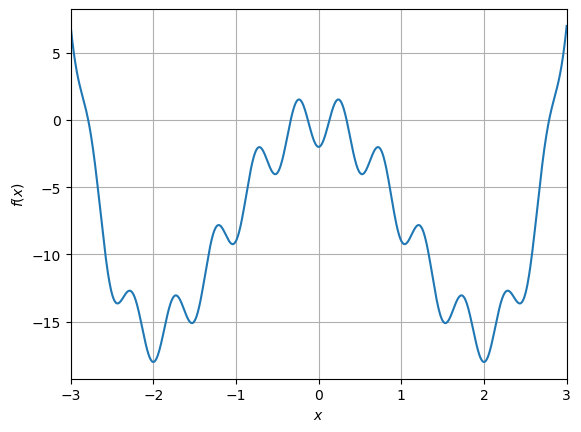

In [50]:
x = np.linspace(-3, 3, 1000)
y = x**4-8*x**2 - 2*np.cos(4*np.pi*(x))
plt.plot(x, y)
plt.grid(True)
plt.xlim(-3, 3)
plt.xlabel('$x$')
plt.ylabel('$f(x)$') 
plt.show()

## A) 
Using the gradient descent method, locate the global minimum starting with three initial guesses $\theta_0=-1,0.5,3$. For each descent step, plot a **red dot** on the above plot and save it locally until it converges. Make a **video** by processing your saved figures (you may want to look into "cv2.VideoWriter"). You should tune the learning parameter at each step! 

Do you get consistent results? 

In [1]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Define the cost function
def cost_function(theta):
    return theta**4 - 8 * theta**2 - 2 * np.cos(4 * np.pi * theta)

# Compute the gradient of the cost function
def gradient(theta):
    return 4 * theta**3 - 16 * theta + 8 * np.pi * np.sin(4 * np.pi * theta)

# Gradient Descent
def gradient_descent(initial_guess, learning_rate, num_steps):
    theta_values = [initial_guess]
    cost_values = [cost_function(initial_guess)]

    for _ in range(num_steps):
        current_theta = theta_values[-1]
        gradient_value = gradient(current_theta)
        new_theta = current_theta - learning_rate * gradient_value

        theta_values.append(new_theta)
        cost_values.append(cost_function(new_theta))

    return theta_values, cost_values

# Plot the cost function and mark the position with a red dot at each iteration
def plot_and_save_frames(theta_values, cost_values, filename):
    plt.figure(figsize=(10, 6))
    x = np.linspace(-3, 3, 1000)
    y = cost_function(x)
    plt.plot(x, y, label='$H(\\theta)$')
    plt.scatter(theta_values, cost_values, color='red', label='Gradient Descent Steps')

    plt.title('Gradient Descent Convergence')
    plt.xlabel('$\\theta$')
    plt.ylabel('$H(\\theta)$')
    plt.legend()
    plt.grid(True)
    plt.xlim(-3, 3)

    plt.savefig(filename)
    plt.close()

# Gradient Descent Parameters
initial_guesses = [-1, 0.5, 3]
learning_rate = 0.01
num_steps = 100

# Create a video by processing saved figures
video_filename = 'gradient_descent_convergence.mp4'
video_writer = cv2.VideoWriter(video_filename, cv2.VideoWriter_fourcc(*'mp4v'), 10, (1000, 600))

for initial_guess in initial_guesses:
    theta_values, cost_values = gradient_descent(initial_guess, learning_rate, num_steps)
    for i in range(num_steps):
        filename = f'frame_{initial_guess}_{i}.png'
        plot_and_save_frames(theta_values[:i+1], cost_values[:i+1], filename)
        frame = cv2.imread(filename)
        video_writer.write(frame)

# Release the video writer
video_writer.release()


'''--------------------Write your code above this line------------------------------'''

'--------------------Write your code above this line------------------------------'

<div style="text-align: center;">
    <h3><strong> Elementary Hamiltonian Monte Carlo: Metropolis–Hastings algorithm </strong></h3>
</div>

As we discussed in class, Metropolis–Hastings algorithm is a Monte Carlo method that is used for optimization. In here, we will look at some basics. In Bayesian inference, the posterior can be expressed as Boltzmann factors, 

$$ P(\theta)=\frac{e^{-\beta H(\theta)}}{Z},$$

where $H$ is Hamiltonian, $\beta=1/kT$, and Z is the partition function. Let's start with an initial parameter guess $\theta_0$. Let's randomly move from $\theta_1 \to \theta_0+\Delta\theta$, where the step follows a Gaussian $\Delta \theta \sim \mathcal{N}(0,\sigma)$ (Markov process). Note, it must be symmetric. Then, the ratio,

$$   r=\frac{e^{-\beta H(\theta^*)}}{e^{-\beta H(\theta)}}=e^{-\beta H(\theta^*)+\beta H(\theta)}=e^{-\beta \Delta H(\theta^*,\theta)}.$$

If $r >1$, we accept it and set $\theta_1 \to \theta_0$. On the other hand, $r<1$, we accept it with probability $r$ and set $\theta_1 \to \theta_0$. If rejected, keep $\theta_0=\theta_0$. This is an elementary demonstration of the Hamiltonian Monte Carlo (no auxiliary momentum and kinetic energy). 


## B)
Use the Metropolis–Hastings algorithm above to estimate the minimum of the noisy $\phi4$ with initial guesses $\theta_0=-1,0.5,3$. You should try different $\beta$. 

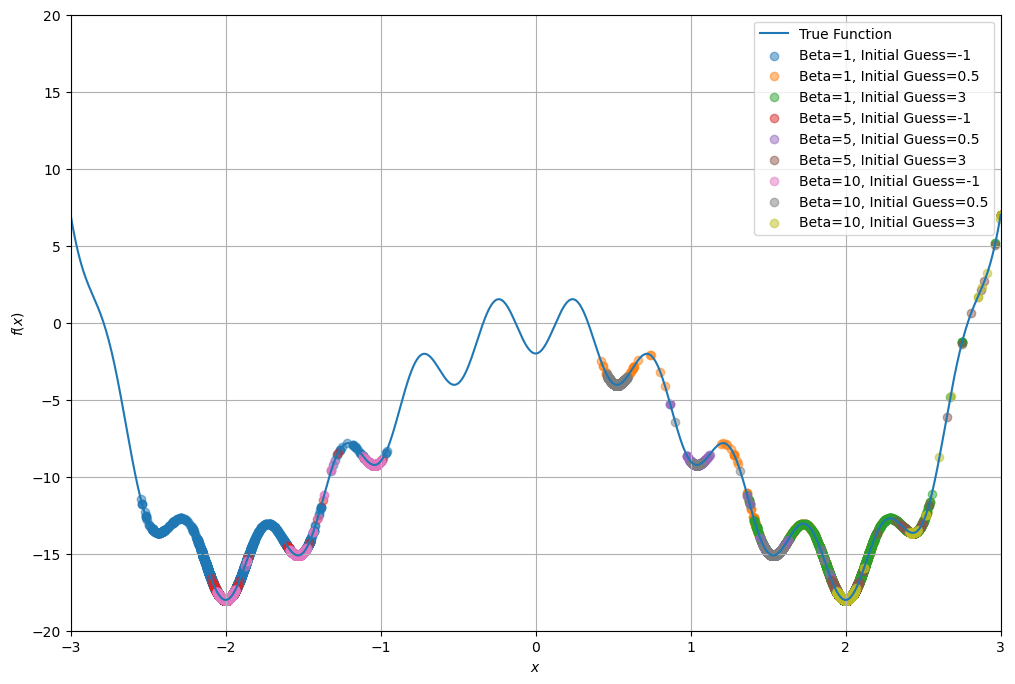

'--------------------Write your code above this line------------------------------'

In [15]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

def phi4(theta):
    return theta**4 - 8*theta**2 - 2*np.cos(4*np.pi*theta)

def metropolis_hastings(theta, beta, sigma, num_steps):
    theta_history = [theta]

    for _ in range(num_steps):
        theta_prime = theta + np.random.normal(0, sigma)
        delta_H = phi4(theta_prime) - phi4(theta)
        acceptance_ratio = np.exp(-beta * delta_H)
        if np.random.uniform(0, 1) < acceptance_ratio:
            theta = theta_prime
        theta_history.append(theta)

    return np.array(theta_history)

plt.figure(figsize=(12, 8))

# Plot the true function
x = np.linspace(-3, 3, 1000)
y = phi4(x)
plt.plot(x, y, label='True Function')

# Initial guesses
initial_guesses = [-1, 0.5, 3]
num_steps = 10000
sigma = 0.1

# Change the value of beta to observe its impact
beta_values = [ 1,5,10]

for beta in beta_values:
    # Run Metropolis–Hastings for each initial guess
    for initial_guess in initial_guesses:
        samples = metropolis_hastings(initial_guess, beta, sigma, num_steps)
        plt.scatter(samples, phi4(samples), label=f'Beta={beta}, Initial Guess={initial_guess}', alpha=0.5)

plt.grid(True)
plt.xlim(-3, 3)
plt.ylim(-20, 20)  # Set y-axis limits
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()






'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong>  Simulated Annealing  </strong></h3>
</div>
Simulated Annealing is a probabilistic optimization algorithm inspired by the annealing process in metal. The cooling schedule is usually defined as the following,

$$ \beta_{i+1} = \beta_{i} +\delta_i,$$

where we update the inverse temperature each step. This update will change the Metropolis criterion, 

$$r_i=e^{-\beta_i \Delta H(\theta^*,\theta)}> u_i $$

where $u_i \sim U(0,1)$. The cooling schedule is a critical aspect of Simulated Annealing. It determines the rate at which the temperature decreases. 



## C)
Add a cooling schedule to the Metropolis–Hastings algorithm above. Then, estimate the minimum of the noisy $\phi4$ with initial guesses $\theta_0=-1,0.5,3$. You should try different cooling schedule e.g. $\delta_i$. Make a graphical comparison of the convergence steps with cooling and without cooling. 

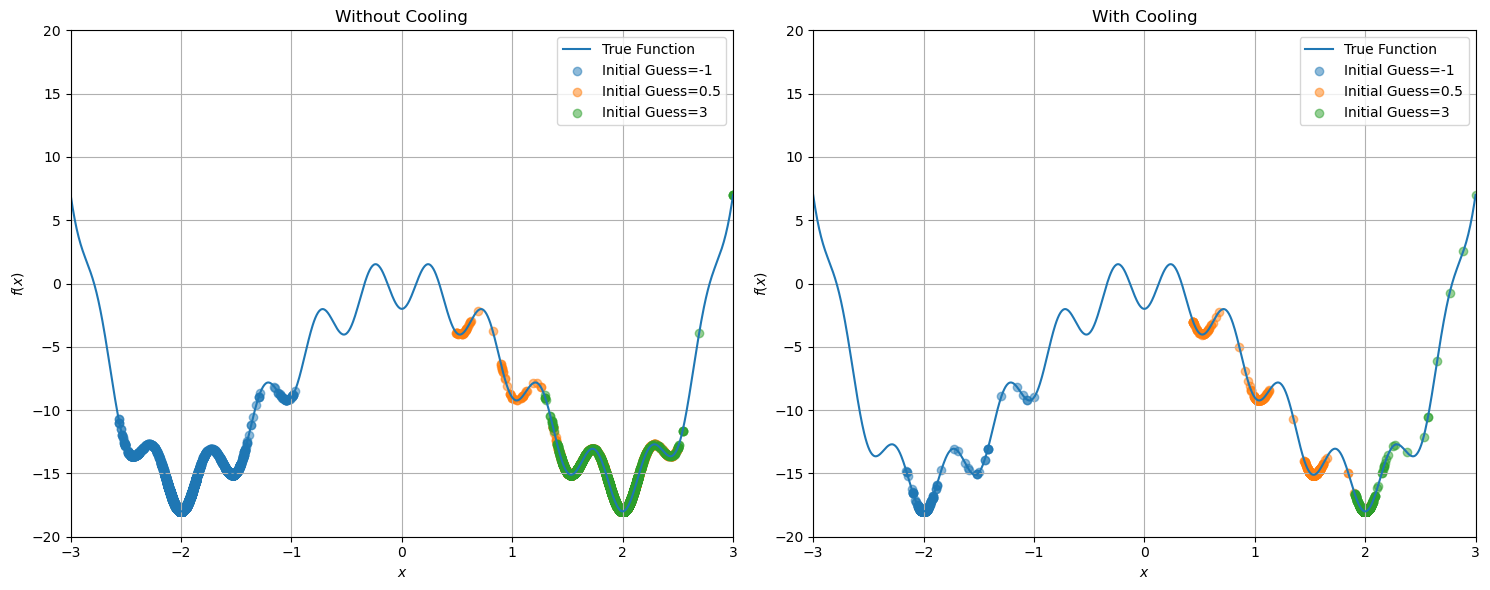

'--------------------Write your code above this line------------------------------'

In [17]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt

def phi4(theta):
    return theta**4 - 8*theta**2 - 2*np.cos(4*np.pi*theta)

def metropolis_hastings(theta, beta, sigma, num_steps):
    theta_history = [theta]

    for _ in range(num_steps):
        theta_prime = theta + np.random.normal(0, sigma)
        delta_H = phi4(theta_prime) - phi4(theta)
        acceptance_ratio = np.exp(-beta * delta_H)
        if np.random.uniform(0, 1) < acceptance_ratio:
            theta = theta_prime
        theta_history.append(theta)

    return np.array(theta_history)

def metropolis_hastings_with_annealing(theta, beta, sigma, num_steps, cooling_delta):
    theta_history = [theta]

    for i in range(num_steps):
        current_beta = beta + i * cooling_delta
        theta_prime = theta + np.random.normal(0, sigma)
        delta_H = phi4(theta_prime) - phi4(theta)
        acceptance_ratio = np.exp(-current_beta * delta_H)
        if np.random.uniform(0, 1) < acceptance_ratio:
            theta = theta_prime
        theta_history.append(theta)

    return np.array(theta_history)

plt.figure(figsize=(15, 6))

# Plot the true function
x = np.linspace(-3, 3, 1000)
y = phi4(x)
plt.subplot(1, 2, 1)
plt.plot(x, y, label='True Function')
plt.title('Without Cooling')

# Initial guesses
initial_guesses = [-1, 0.5, 3]
num_steps = 10000
sigma = 0.1

# Run Metropolis–Hastings without cooling for each initial guess
for initial_guess in initial_guesses:
    samples = metropolis_hastings(initial_guess, beta=1, sigma=sigma, num_steps=num_steps)
    plt.scatter(samples, phi4(samples), label=f'Initial Guess={initial_guess}', alpha=0.5)

plt.grid(True)
plt.xlim(-3, 3)
plt.ylim(-20, 20)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()

# Run Metropolis–Hastings with cooling for each initial guess
plt.subplot(1, 2, 2)
plt.plot(x, y, label='True Function')
plt.title('With Cooling')

for initial_guess in initial_guesses:
    samples = metropolis_hastings_with_annealing(initial_guess, beta=1, sigma=sigma, num_steps=num_steps, cooling_delta=0.01)
    plt.scatter(samples, phi4(samples), label=f'Initial Guess={initial_guess}', alpha=0.5)

plt.grid(True)
plt.xlim(-3, 3)
plt.ylim(-20, 20)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()

plt.tight_layout()
plt.show()


'''--------------------Write your code above this line------------------------------'''